<table>
<tr>
    <th> Roll no. </td>
    <th> Name </td>
  </tr>
  <tr>
    <td><center> N002 </td>
    <td><center> Shyam Kumar </td>
  </tr>
  <tr>
    <td><center> N021 </td>
    <td><center> Saransh Dhapola </td>
  </tr>
  <tr>
    <td><center> N031 </td>
    <td><center> Shourya Gupta </td>
  </tr>
   <tr>
    <td colspan="2"><center> <b> Program and Division: </b> MBA Tech CE D</td>
  </tr>  
</table>

# **MBTI classification using NLP and ML**

### **Import libraries**

In [ ]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os

!pip install squarify
import squarify

# Importing libraries for text processing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm

# WordCloud related libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import classifiers and machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, auc

# Feature extraction and preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Handling imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Plotly for visualization
import plotly.express as px

# Download necessary NLTK data
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Functions**

In [ ]:
def most_common_words(df):
  words = list(df["posts"].apply(lambda x: x.split()))
  words = [x for y in words for x in y]
  print(Counter(words).most_common(10))

In [ ]:
def clear_text(df):
    data_length=[]
    cleaned_text=[]

    lemmatizer=WordNetLemmatizer()

    stop_words = set(stopwords.words('english')) # Load stop words

    mbti_types = ['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp', 'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']

    print("Cleaning The Dataset")
    for sentence in tqdm(df.posts):
        sentence=sentence.lower()
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        sentence=re.sub('[^0-9a-z]',' ',sentence)

        sentence = " ".join([word for word in sentence.split() if word not in stop_words]) # Remove stop words

        for mbti in mbti_types:
            sentence = re.sub(mbti, '', sentence)

        sentence = lemmatizer.lemmatize(sentence) # Lemmatize words

        data_length.append(len(sentence.split()))

        cleaned_text.append(sentence)

    return cleaned_text, data_length

In [ ]:
def wordcloud_for_each_type(df, vectorizer = None):
  personality_types = df['type'].unique()
  num_types = len(personality_types)
  rows = 4
  cols = 4

  fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

  for i, personality_type in enumerate(personality_types):
    if i < rows * cols:
      row = i // cols
      col = i % cols

      df_type = df[df['type'] == personality_type]

      if vectorizer is None:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df_type['posts'].to_string())

      else:
        tfidf_matrix = vectorizer.transform(df_type['posts'])
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = dict(zip(feature_names, tfidf_matrix.toarray()[0]))

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

      axes[row, col].imshow(wordcloud, interpolation='bilinear')
      axes[row, col].set_title(personality_type)
      axes[row, col].axis("off")

  for i in range(num_types, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

  plt.tight_layout()
  plt.show()

In [ ]:
def split(df):
    train_data,test_data=train_test_split(df, test_size=0.2,random_state=0,stratify=df.type)

    #Applying the vectorizer transform
    train_post=vectorizer.transform(train_data.posts).toarray()
    test_post=vectorizer.transform(test_data.posts).toarray()

    #Getting the final train and test
    print("Getting the final train and test")
    train_target=target_encoder.transform(train_data.type)
    test_target=target_encoder.transform(test_data.type)
    print(target_encoder.classes_)
    return train_post, test_post, train_target, test_target

In [ ]:
def model(X_train, X_test, y_train, y_test, count):
    models_accuracy = {}
    report = {}
    f1_scores = {}
    predictions = {}

    # KNN
    print("Running KNN")
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, y_train)
    pred_knn = neigh.predict(X_test)
    predictions['KNN'] = pred_knn

    models_accuracy['KNN'] = accuracy_score(y_test, pred_knn)
    f1_scores['KNN'] = f1_score(y_test, pred_knn, average='macro')
    report['KNN'] = classification_report(y_train, neigh.predict(X_train), zero_division=0)


    # Logistic Regression
    print("Running Logistic Regression")
    model_log = LogisticRegression(max_iter=3000, C=0.5, n_jobs=-1)
    model_log.fit(X_train, y_train)
    pred_log = model_log.predict(X_test)
    predictions['Logistic Regression'] = pred_log

    models_accuracy['Logistic Regression'] = accuracy_score(y_test, pred_log)
    f1_scores['Logistic Regression'] = f1_score(y_test, pred_log, average='macro')
    report['Logistic Regression'] = classification_report(y_train, model_log.predict(X_train), zero_division=0)


    # Linear SVC
    print("Running Linear SVC")
    model_linear_SVC = LinearSVC(C=0.1)
    model_linear_SVC.fit(X_train, y_train)
    pred_linear_svc = model_linear_SVC.predict(X_test)
    predictions['Linear SVC'] = pred_linear_svc

    models_accuracy['Linear Support Vector Classifier'] = accuracy_score(y_test, pred_linear_svc)
    f1_scores['Linear Support Vector Classifier'] = f1_score(y_test, pred_linear_svc, average='macro')
    report['Linear Support Vector Classifier'] = classification_report(y_test, pred_linear_svc,
                                                                     target_names=target_encoder.inverse_transform(
                                                                         [i for i in range(count)]), zero_division=0)


    # Multinomial Naive Bayes
    print("Running Multinomial Naive Bayes")
    model_multinomial_nb = MultinomialNB()
    model_multinomial_nb.fit(X_train, y_train)
    pred_multinomial_nb = model_multinomial_nb.predict(X_test)
    predictions['Multinomial Naive Bayes'] = pred_multinomial_nb

    models_accuracy['Multinomial Naive Bayes'] = accuracy_score(y_test, pred_multinomial_nb)
    f1_scores['Multinomial Naive Bayes'] = f1_score(y_test, pred_multinomial_nb, average='macro')
    report['Multinomial Naive Bayes'] = classification_report(y_test, pred_multinomial_nb,
                                                            target_names=target_encoder.inverse_transform(
                                                                [i for i in range(count)]), zero_division=0)


    # Random Forest
    print("Running Random Forest")
    model_forest = RandomForestClassifier(max_depth=10)
    model_forest.fit(X_train, y_train)
    pred_forest = model_forest.predict(X_test)
    predictions['Random Forest Classifier'] = pred_forest

    models_accuracy['Random Forest Classifier'] = accuracy_score(y_test, pred_forest)
    f1_scores['Random Forest Classifier'] = f1_score(y_test, pred_forest, average='macro')
    report['Random Forest Classifier'] = classification_report(y_test, pred_forest,
                                                              target_names=target_encoder.inverse_transform(
                                                                  [i for i in range(count)]), zero_division=0)


    # Decision Tree
    print("Running Decision Tree")
    model_tree = DecisionTreeClassifier(max_depth=5)
    model_tree.fit(X_train, y_train)
    pred_tree = model_tree.predict(X_test)
    predictions['Decision Tree'] = pred_tree

    models_accuracy['Decision Tree'] = accuracy_score(y_test, pred_tree)
    f1_scores['Decision Tree'] = f1_score(y_test, pred_tree, average='macro')
    report['Decision Tree'] = classification_report(y_test, pred_tree,
                                                   target_names=target_encoder.inverse_transform(
                                                       [i for i in range(count)]), zero_division=0)


    # # XGBoost
    # print("Running XGBoost")
    # model_xgb = XGBClassifier(tree_method="hist", device="cuda")
    # model_xgb.fit(X_train, y_train)
    # pred_xgb = model_xgb.predict(X_test)
    # predictions['XGBoost Classifier'] = pred_xgb

    # models_accuracy['XGBoost Classifier'] = accuracy_score(y_test, pred_xgb)
    # f1_scores['XGBoost Classifier'] = f1_score(y_test, pred_xgb, average='macro')
    # report['XGBoost Classifier'] = classification_report(y_test, pred_xgb,
    #                                                     target_names=target_encoder.inverse_transform(
    #                                                         [i for i in range(count)]), zero_division=0)


    accuracy = pd.DataFrame(models_accuracy.items(), columns=['Models', 'Test accuracy'])
    f1 = pd.DataFrame(f1_scores.items(), columns=['Models', 'Test F1 Score'])

    return accuracy, report, f1, predictions


In [ ]:
def plot_roc_curves(y_test, predictions, model_names):
    plt.figure(figsize=(10, 6))

    for name in model_names:
        if name != "Linear SVC":  # Skip Linear SVC
            fpr, tpr, _ = roc_curve(y_test, predictions[name], pos_label=1)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

### **Loading Dataset**

In [ ]:
# Download latest version
dataset_path = kagglehub.dataset_download("datasnaek/mbti-type")

# Find the CSV file within the dataset directory
csv_file_path = None  # Initialize csv_file_path to None
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop searching after finding the first CSV file

# Check if a CSV file was found
if csv_file_path:
    # Read the CSV file
    df_0 = pd.read_csv(csv_file_path)
else:
    print("No CSV file found in the dataset directory.")

df = df_0.copy()

100%|██████████| 24.4M/24.4M [00:00<00:00, 105MB/s]

Extracting files...


### **Data exploration and visualisation**

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.shape

(8675, 2)

In [ ]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [ ]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
df.groupby(['type']).count()*50

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


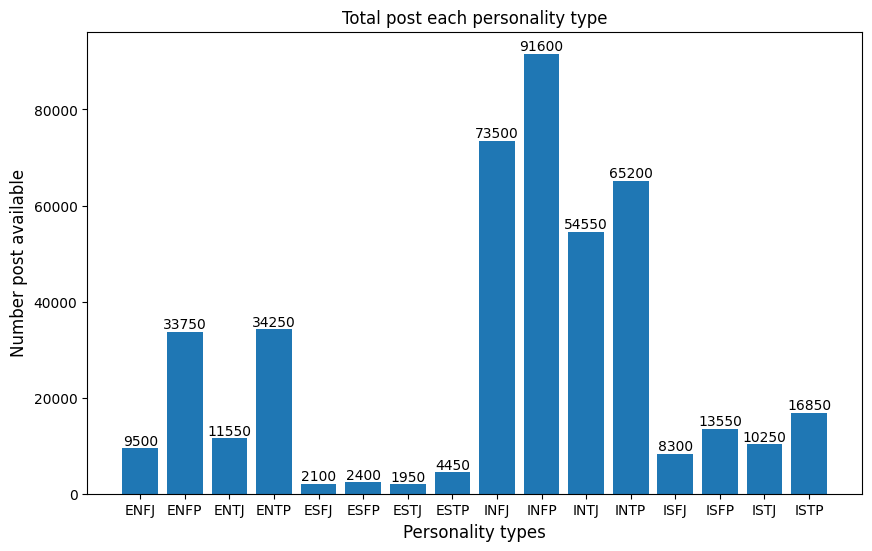

In [ ]:
total = df.groupby(['type']).count()*50
plt.figure(figsize = (10,6))
plt.bar(np.array(total.index), height =total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')
for i, v in enumerate(total['posts']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
px.pie(df,names='type',title='Personality type',hole=0.5)

<Figure size 1500x1500 with 0 Axes>

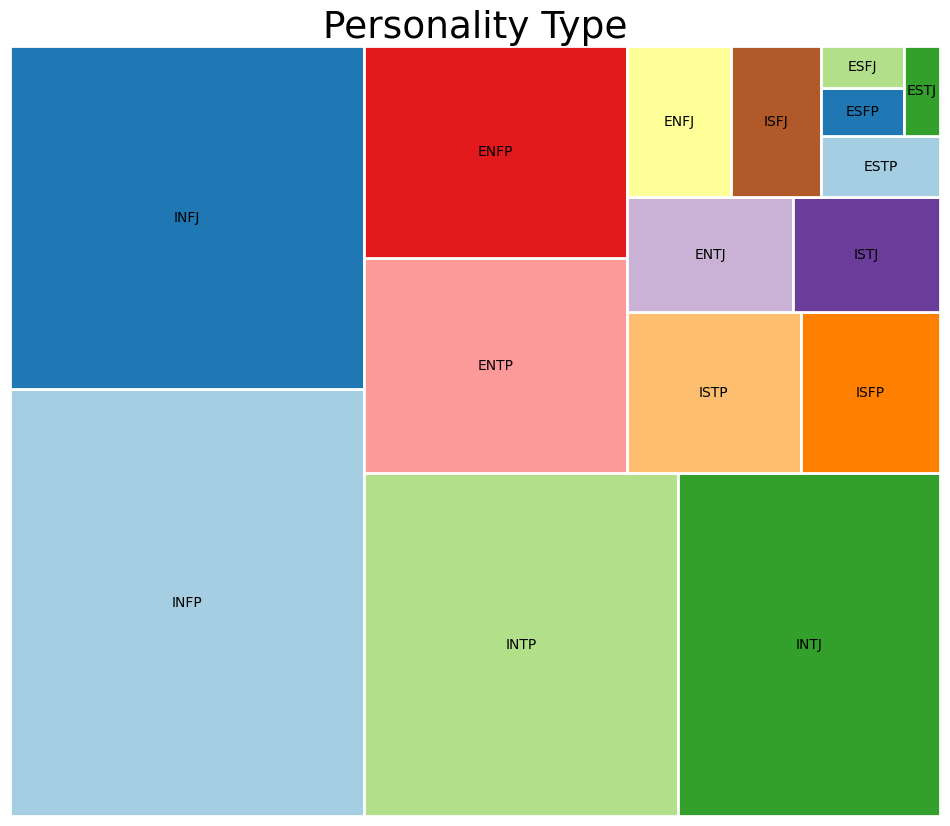

In [ ]:
count=dict(df['type'].value_counts())

plt.figure(figsize=(12,10))
squarify.plot(sizes=count.values(), color=sns.color_palette('Paired'), pad=False, linewidth=2, edgecolor='white', label=count.keys())
plt.title('Personality Type', fontsize=27)
plt.axis('off')
plt.show()

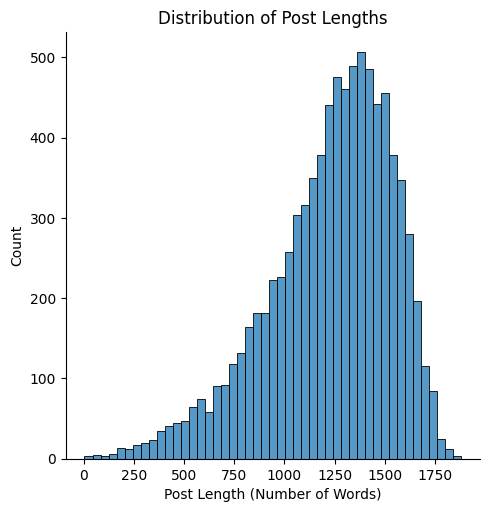

In [ ]:
df["length_posts"] = df['posts'].apply(lambda x: len(x.split()))
sns.displot(df["length_posts"])
plt.title("Distribution of Post Lengths")
plt.xlabel("Post Length (Number of Words)")
plt.ylabel("Count")
plt.show()

In [ ]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)

In [ ]:
df

,type,posts,length_posts,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,556,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,1170,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,836,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1064,21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,967,19.34
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,796,15.92
8671,ENFP,'So...if this thread already exists someplace ...,1309,26.18
8672,INTP,'So many questions when i do these things. I ...,948,18.96
8673,INFP,'I am very conflicted right now when it comes ...,1705,34.10


In [ ]:
most_common_words(df)

[('I', 387957), ('to', 290168), ('the', 270699), ('a', 230918), ('and', 219498), ('of', 177853), ('is', 128804), ('you', 128750), ('that', 127221), ('in', 117263)]


In [ ]:
df.posts, length = clear_text(df)

Cleaning The Dataset


100%|██████████| 8675/8675 [00:17<00:00, 482.09it/s] 


In [ ]:
df['length_posts'] = length
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)

In [ ]:
df

,type,posts,length_posts,words_per_comment
0,INFJ,moments sportscenter top ten plays pranks lif...,304,6.08
1,ENTP,finding lack posts alarming sex boring positio...,560,11.20
2,INTP,good one course say know blessing curse absolu...,441,8.82
3,INTJ,dear enjoyed conversation day esoteric gabbin...,530,10.60
4,ENTJ,fired another silly misconception approaching ...,479,9.58
...,...,...,...,...
8670,ISFP,always think cats fi doms reason websites beco...,401,8.02
8671,ENFP,thread already exists someplace else heck dele...,622,12.44
8672,INTP,many questions things would take purple pill p...,493,9.86
8673,INFP,conflicted right comes wanting children honest...,765,15.30


In [ ]:
most_common_words(df)

[('like', 69675), ('think', 49837), ('people', 47855), ('one', 37167), ('know', 36937), ('really', 35291), ('would', 35015), ('get', 30804), ('time', 27610), ('feel', 23337)]


In [ ]:
wordcloud_for_each_type(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

In [ ]:
vectorizer.fit(df.posts)

TfidfVectorizer(max_features=5000)

In [ ]:
wordcloud_for_each_type(df, vectorizer)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
target_encoder = LabelEncoder()

In [ ]:
target_encoder.fit(df.type)

LabelEncoder()

In [ ]:
name_mapping = dict(zip(target_encoder.classes_, target_encoder.fit_transform(target_encoder.classes_)))
new_dict = dict([(value, key) for key, value in name_mapping.items()])
new_dict

{0: 'ENFJ',
 1: 'ENFP',
 2: 'ENTJ',
 3: 'ENTP',
 4: 'ESFJ',
 5: 'ESFP',
 6: 'ESTJ',
 7: 'ESTP',
 8: 'INFJ',
 9: 'INFP',
 10: 'INTJ',
 11: 'INTP',
 12: 'ISFJ',
 13: 'ISFP',
 14: 'ISTJ',
 15: 'ISTP'}

### **Model evaluation using different techniques**

In [ ]:
X_train, X_test, y_train, y_test = split(df)

Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [ ]:
X_train.shape

(6940, 5000)

In [ ]:
pd.DataFrame(y_train)[0].value_counts()

,count
0,
9,1466
8,1176
11,1043
10,873
3,548
1,540
15,270
13,217
2,185


In [ ]:
model_accuracy_og, report_og, f1_og, predictions_og = model(X_train, X_test, y_train, y_test, 16)

model_accuracy_og.sort_values(by = 'Test accuracy', ascending = False, ignore_index = True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Linear Support Vector Classifier,0.397695
1,Logistic Regression,0.376369
2,Multinomial Naive Bayes,0.304323
3,Random Forest Classifier,0.261671
4,Decision Tree,0.254179
5,KNN,0.217291


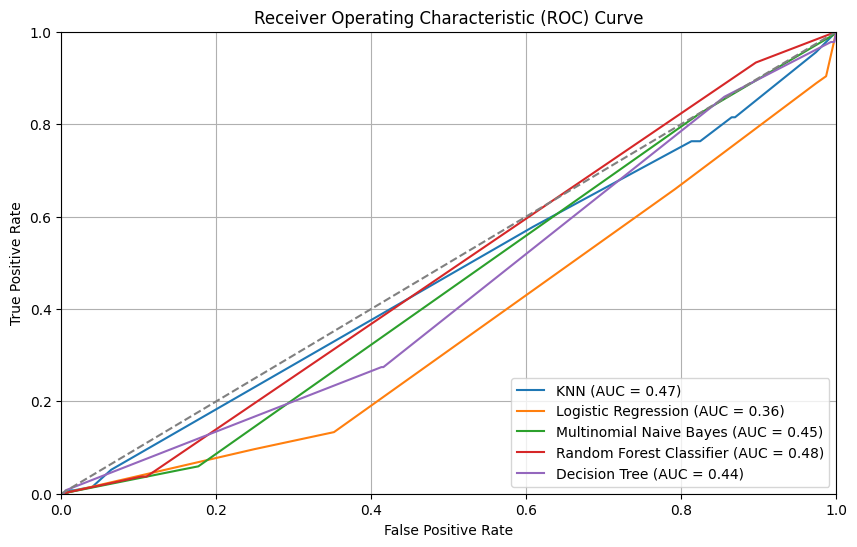

In [ ]:
plot_roc_curves(y_test, predictions_og, predictions_og.keys())

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape

(23456, 5000)

In [ ]:
pd.DataFrame(y_train_smote)[0].value_counts()

,count
0,
15,1466
8,1466
9,1466
10,1466
3,1466
11,1466
1,1466
13,1466
7,1466


In [ ]:
model_accuracy_smote, report_smote, f1_smote, predictions_smote = model(X_train_smote, X_test, y_train_smote, y_test, 16)

model_accuracy_smote.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Logistic Regression,0.398847
1,Linear Support Vector Classifier,0.395389
2,Multinomial Naive Bayes,0.346974
3,Random Forest Classifier,0.246686
4,Decision Tree,0.151009
5,KNN,0.073199


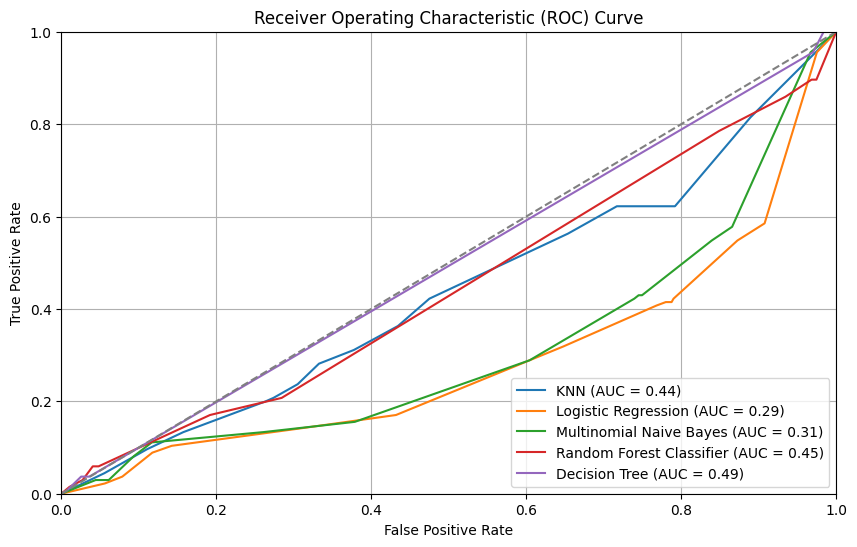

In [ ]:
plot_roc_curves(y_test, predictions_smote, predictions_smote.keys())

In [ ]:
sampling_strategy = {9: 600, 8: 600, 11: 600, 10: 600}

# Apply undersampling
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
X_train_under.shape

(4782, 5000)

In [ ]:
pd.DataFrame(y_train_under)[0].value_counts()

,count
0,
8,600
9,600
10,600
11,600
3,548
1,540
15,270
13,217
2,185


In [ ]:
model_accuracy_under, report_under, f1_under, predictions_under = model(X_train_under, X_test, y_train_under, y_test, 16)

model_accuracy_under.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Linear Support Vector Classifier,0.397118
1,Logistic Regression,0.380980
2,Multinomial Naive Bayes,0.350432
3,Random Forest Classifier,0.299712
4,Decision Tree,0.248991
5,KNN,0.183862


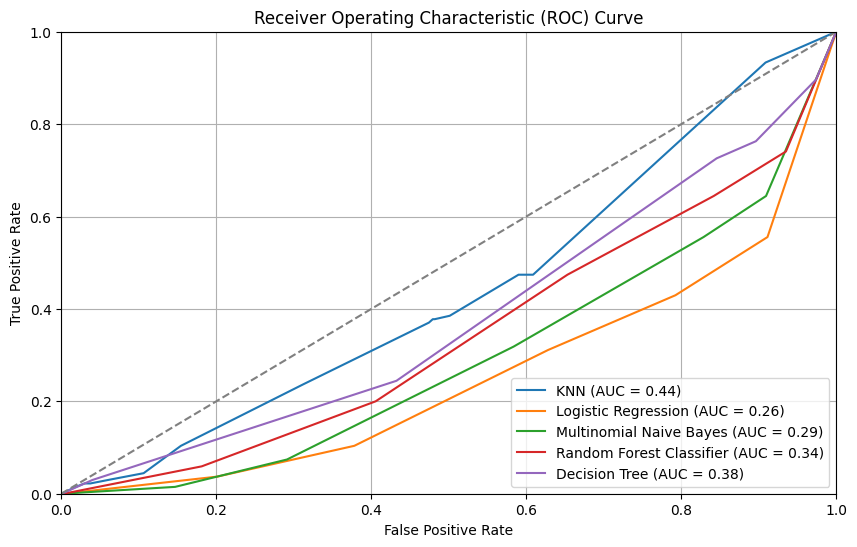

In [ ]:
plot_roc_curves(y_test, predictions_under, predictions_under.keys())

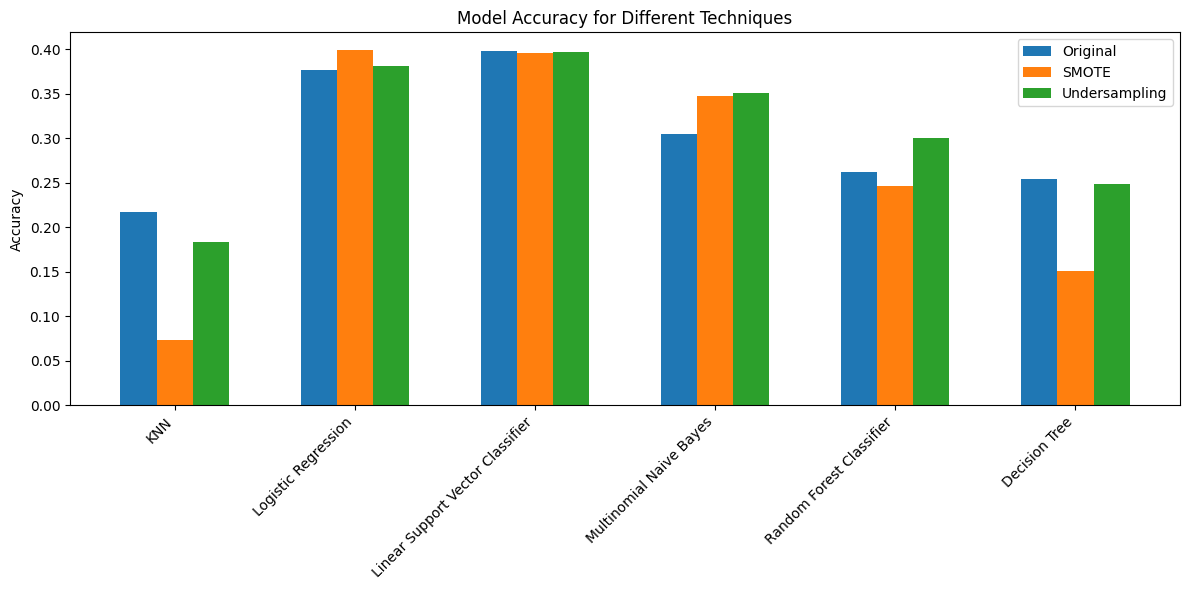

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = model_accuracy_og['Models'].unique()
techniques = ['Original', 'SMOTE', 'Undersampling']
width = 0.2  # Width of the bars

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, model_accuracy_og['Test accuracy'], width, label='Original')
rects2 = ax.bar(x, model_accuracy_smote['Test accuracy'], width, label='SMOTE')
rects3 = ax.bar(x + width, model_accuracy_under['Test accuracy'], width, label='Undersampling')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy for Different Techniques')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

### **4 type**

In [ ]:
df_4types = df.replace(['INTJ', 'INTP', 'ENTJ', 'ENTP' ], 'Analysts')

df_4types = df_4types.replace(['INFJ', 'INFP', 'ENFJ', 'ENFP'], 'Diplomats')

df_4types = df_4types.replace(['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'], 'Sentinels')

df_4types = df_4types.replace(['ISTP', 'ISFP', 'ESTP', 'ESFP'], 'Explorers')

In [ ]:
df_4types.head()

,type,posts,length_posts,words_per_comment
0,Diplomats,moments sportscenter top ten plays pranks lif...,304,6.08
1,Analysts,finding lack posts alarming sex boring positio...,560,11.20
2,Analysts,good one course say know blessing curse absolu...,441,8.82
3,Analysts,dear enjoyed conversation day esoteric gabbin...,530,10.60
4,Analysts,fired another silly misconception approaching ...,479,9.58


In [ ]:
df_4types.type.value_counts()

,count
type,
Diplomats,4167
Analysts,3311
Explorers,745
Sentinels,452


Text(0.5, 1.0, 'Total post each personality type')

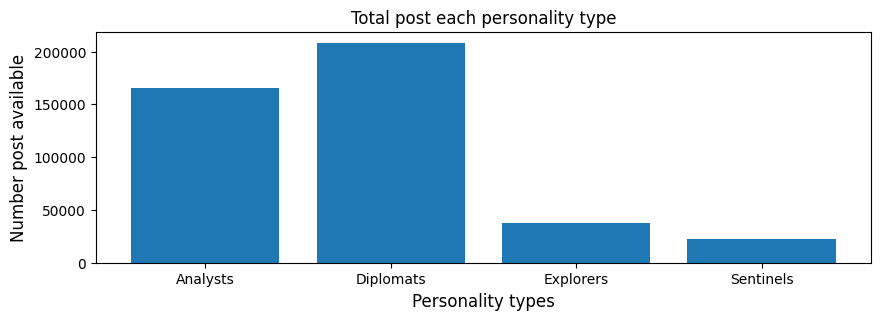

In [ ]:
total_club = df_4types.groupby(['type']).count()*50
plt.figure(figsize = (10,3))
plt.bar(np.array(total_club.index), height = total_club['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

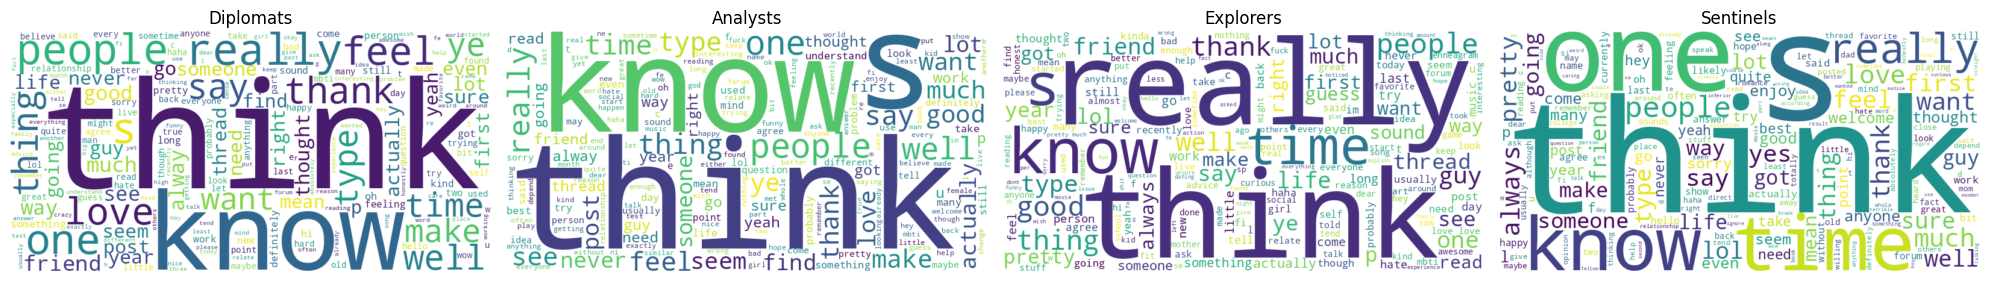

In [ ]:
wordcloud_for_each_type(df_4types)

In [ ]:
vectorizer.fit(df_4types.posts)

TfidfVectorizer(max_features=5000)

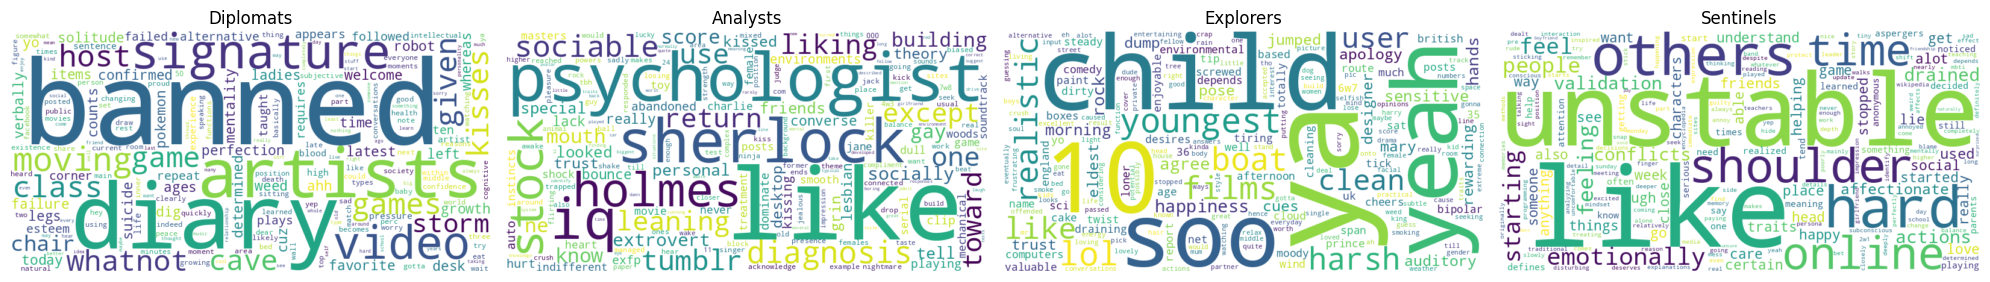

In [ ]:
wordcloud_for_each_type(df_4types, vectorizer)

In [ ]:
target_encoder.fit(df_4types.type)

LabelEncoder()

In [ ]:
X_train, X_test, y_train, y_test = split(df_4types)

pd.DataFrame(y_train)[0].value_counts()

Getting the final train and test
['Analysts' 'Diplomats' 'Explorers' 'Sentinels']


,count
0,
1,3333
0,2649
2,596
3,362


In [ ]:
model_accuracy_og, report_og, f1_og, predictions_og = model(X_train, X_test, y_train, y_test, 4)

model_accuracy_og.sort_values(by = 'Test accuracy', ascending = False, ignore_index = True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Linear Support Vector Classifier,0.693948
1,Logistic Regression,0.691066
2,Multinomial Naive Bayes,0.640922
3,Random Forest Classifier,0.615562
4,Decision Tree,0.551009
5,KNN,0.512392


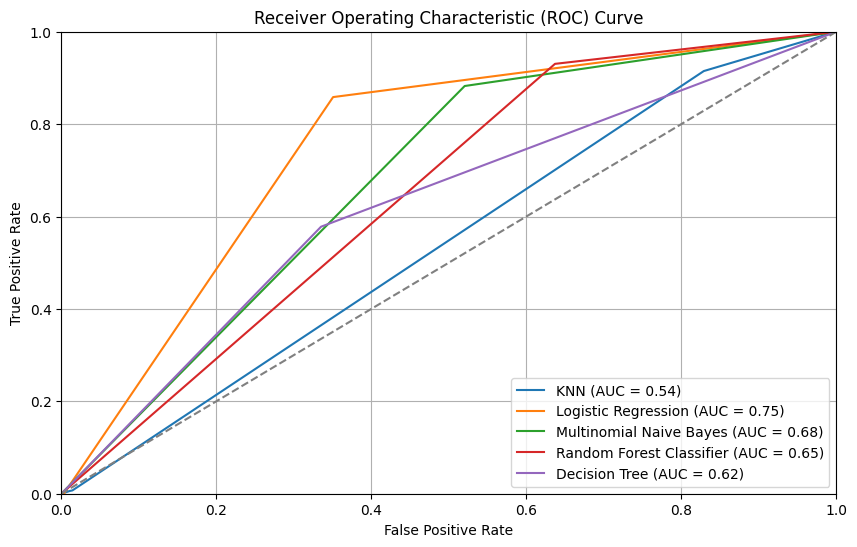

In [ ]:
plot_roc_curves(y_test, predictions_og, predictions_og.keys())

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

pd.DataFrame(y_train_smote)[0].value_counts()

,count
0,
1,3333
0,3333
3,3333
2,3333


In [ ]:
model_accuracy_smote, report_smote, f1_smote, predictions_smote = model(X_train_smote, X_test, y_train_smote, y_test, 4)

model_accuracy_smote.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Logistic Regression,0.673199
1,Linear Support Vector Classifier,0.663401
2,Multinomial Naive Bayes,0.623631
3,Random Forest Classifier,0.592507
4,Decision Tree,0.438617
5,KNN,0.146398


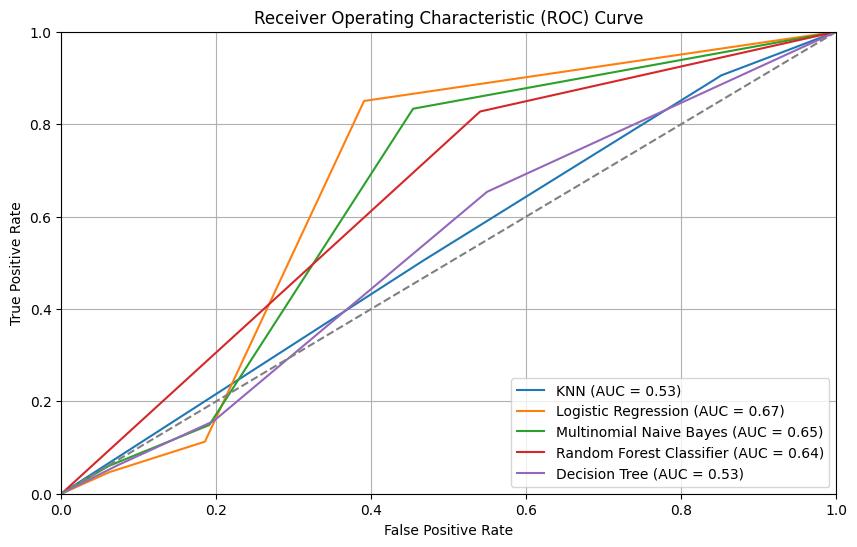

In [ ]:
plot_roc_curves(y_test, predictions_smote, predictions_smote.keys())

In [ ]:
sampling_strategy = {1: 600, 0: 600}

# Apply undersampling
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

pd.DataFrame(y_train_under)[0].value_counts()

,count
0,
0,600
1,600
2,596
3,362


In [ ]:
model_accuracy_under, report_under, f1_under, predictions_under = model(X_train_under, X_test, y_train_under, y_test, 4)

model_accuracy_under.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

Running KNN
Running Logistic Regression
Running Linear SVC
Running Multinomial Naive Bayes
Running Random Forest
Running Decision Tree


,Models,Test accuracy
0,Linear Support Vector Classifier,0.623631
1,Logistic Regression,0.623055
2,Multinomial Naive Bayes,0.608646
3,Random Forest Classifier,0.546974
4,Decision Tree,0.488184
5,KNN,0.458213


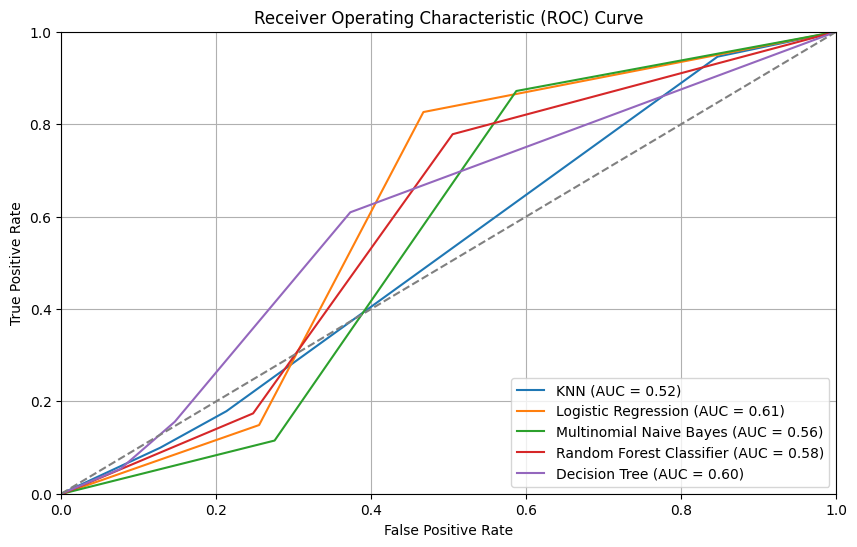

In [ ]:
plot_roc_curves(y_test, predictions_under, predictions_under.keys())

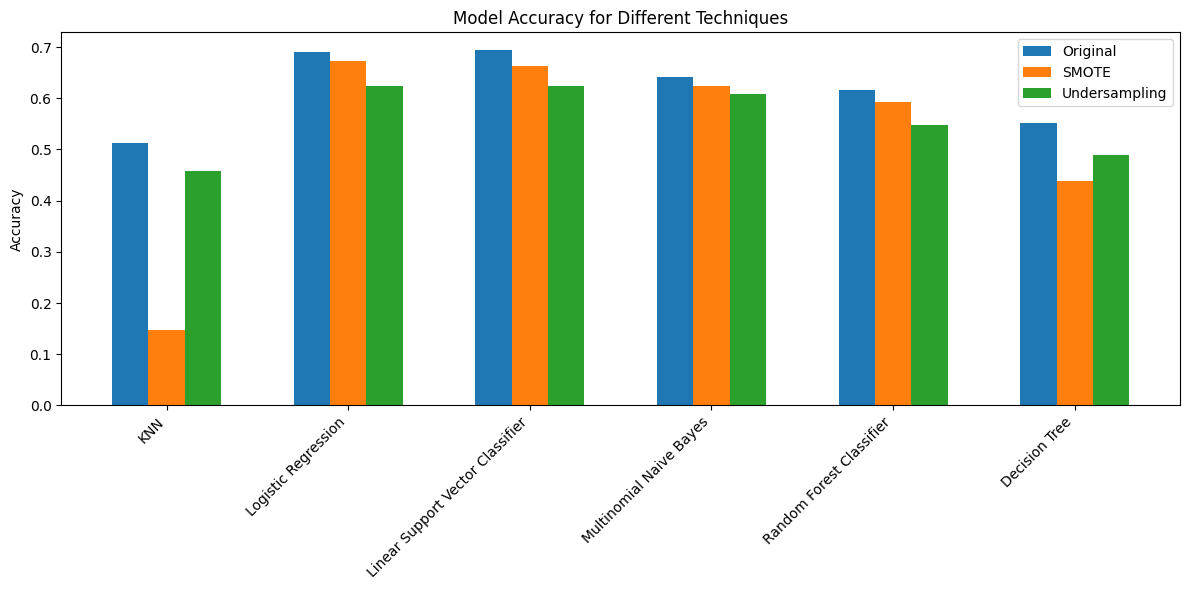

In [ ]:
models = model_accuracy_og['Models'].unique()
techniques = ['Original', 'SMOTE', 'Undersampling']
width = 0.2  # Width of the bars

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, model_accuracy_og['Test accuracy'], width, label='Original')
rects2 = ax.bar(x, model_accuracy_smote['Test accuracy'], width, label='SMOTE')
rects3 = ax.bar(x + width, model_accuracy_under['Test accuracy'], width, label='Undersampling')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy for Different Techniques')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |